In [1]:
import pandas as pd   ##160903  ##160910 ##160917
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline
import datetime

# Importing Data 
the data imprted is turstile count from MTA from 7/Augsut to 25/September

In [2]:
w8=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210925.txt")
w7=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210918.txt")
w6=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210911.txt")
w5=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210904.txt")
w4=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210828.txt")
w3=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210821.txt")
w2=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210814.txt")
w1=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210807.txt")
df=pd.concat([w1,w2,w3,w4,w5,w6,w7,w8])
df.shape

(1676745, 11)

### striping the columns names 

In [3]:
df.columns = [column.strip() for column in df.columns]

In [4]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S") 



### remove dublicate


In [5]:
df.groupby(['C/A','UNIT','SCP','STATION','DATE_TIME']).ENTRIES.count().reset_index().sort_values('ENTRIES',ascending=False).head(119)

#it seems we have 118 dublicate values

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1663467,S101,R070,00-00-02,ST. GEORGE,2021-09-14 20:00:00,2
1663374,S101,R070,00-00-02,ST. GEORGE,2021-08-30 16:00:00,2
1663384,S101,R070,00-00-02,ST. GEORGE,2021-09-01 08:00:00,2
1663382,S101,R070,00-00-02,ST. GEORGE,2021-09-01 00:00:00,2
1503770,R514,R094,00-00-00,ASTORIA BLVD,2021-09-23 08:00:00,2
...,...,...,...,...,...,...
1663430,S101,R070,00-00-02,ST. GEORGE,2021-09-09 00:00:00,2
1663457,S101,R070,00-00-02,ST. GEORGE,2021-09-13 08:00:00,2
1663412,S101,R070,00-00-02,ST. GEORGE,2021-09-06 00:00:00,2
1663432,S101,R070,00-00-02,ST. GEORGE,2021-09-09 08:00:00,2


In [6]:

df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [7]:
df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values('ENTRIES',ascending=False)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-31 00:00:00,1
1117749,R139,R031,04-06-00,34 ST-PENN STA,2021-09-13 04:00:00,1
1117759,R139,R031,04-06-00,34 ST-PENN STA,2021-09-14 20:00:00,1
1117758,R139,R031,04-06-00,34 ST-PENN STA,2021-09-14 16:00:00,1
1117757,R139,R031,04-06-00,34 ST-PENN STA,2021-09-14 12:00:00,1
...,...,...,...,...,...,...
558871,N128,R200,00-05-00,EUCLID AV,2021-08-11 08:00:00,1
558870,N128,R200,00-05-00,EUCLID AV,2021-08-11 04:00:00,1
558869,N128,R200,00-05-00,EUCLID AV,2021-08-11 00:00:00,1
558868,N128,R200,00-05-00,EUCLID AV,2021-08-10 20:00:00,1


In [9]:
daily_ENTRIES=df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.first().diff().reset_index()
daily_ENTRIES_series=pd.Series(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.first().diff().values)
daily_ENTRIES

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-31 00:00:00,NaN
1,A002,R051,02-00-00,59 ST,2021-07-31 04:00:00,11.0
2,A002,R051,02-00-00,59 ST,2021-07-31 08:00:00,5.0
3,A002,R051,02-00-00,59 ST,2021-07-31 12:00:00,38.0
4,A002,R051,02-00-00,59 ST,2021-07-31 16:00:00,122.0
...,...,...,...,...,...,...
1676622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0.0
1676623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,0.0
1676624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,0.0
1676625,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0


some values in the daily entries are not valid from miss calculating or miss registered here are some example of why 
1- the diff between 2 diffrent turnstule is huge and doesnt repersent anything so it should be avoided
2-some turnstile start count in miuns 150,100,90 this would lead to negtive values and we shold take ABS value for it 

for this reason we are crating function that takes negtive values and replace them with Absloute value , outlier and replace them with ZERO

In [10]:
def fix_values(ENT):
  if abs(ENT)>20000:
    return 0
  else :
    return abs(ENT)

In [11]:
daily_ENTRIES['H_ENTRIES']=daily_ENTRIES_series.apply(fix_values)

In [12]:
daily_ENTRIES=daily_ENTRIES.dropna()


In [13]:
daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,H_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-07-31 04:00:00,11.0,11.0
2,A002,R051,02-00-00,59 ST,2021-07-31 08:00:00,5.0,5.0
3,A002,R051,02-00-00,59 ST,2021-07-31 12:00:00,38.0,38.0
4,A002,R051,02-00-00,59 ST,2021-07-31 16:00:00,122.0,122.0
5,A002,R051,02-00-00,59 ST,2021-07-31 20:00:00,155.0,155.0


In [14]:
daily_ENTRIES.groupby('STATION').H_ENTRIES.sum().reset_index()

,STATION,H_ENTRIES
0,1 AV,435601.0
1,103 ST,601794.0
2,103 ST-CORONA,574973.0
3,104 ST,96700.0
4,110 ST,219159.0
...,...,...
374,WOODLAWN,170528.0
375,WORLD TRADE CTR,256025.0
376,WTC-CORTLANDT,210800.0
377,YORK ST,188296.0


In [15]:
daily_ENTRIES['H']=daily_ENTRIES.DATE_TIME.dt.strftime('%H')


<ipython-input-15-dad08a93702c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_ENTRIES['H']=daily_ENTRIES.DATE_TIME.dt.strftime('%H')


now we are crating a mask for the diesired interval to study (4am-12am) and will count number of entries for each station and rank them 

In [16]:

mask =  ((daily_ENTRIES.H == '08') | (daily_ENTRIES.H == '12'))
breakfast=daily_ENTRIES[mask]
breakfast.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,H_ENTRIES,H
2,A002,R051,02-00-00,59 ST,2021-07-31 08:00:00,5.0,5.0,08
3,A002,R051,02-00-00,59 ST,2021-07-31 12:00:00,38.0,38.0,12
8,A002,R051,02-00-00,59 ST,2021-08-01 08:00:00,12.0,12.0,08
9,A002,R051,02-00-00,59 ST,2021-08-01 12:00:00,39.0,39.0,12
14,A002,R051,02-00-00,59 ST,2021-08-02 08:00:00,17.0,17.0,08


In [17]:
#reakfast.groupby('STATION').H_ENTRIES.sum(.reset_index().sort_values(ascending=False)

#reakfast.groupby('STATION').H_ENTRIES.sum().sort_values().reset_index()
breakfast.groupby('STATION').H_ENTRIES.sum().sort_values(ascending=False).reset_index().head(15)
## represent the total sum of entries for each station from 4-12
for_plot=breakfast.groupby('STATION').H_ENTRIES.sum().sort_values(ascending=False).reset_index()

In [18]:
for_plot.head(5)

## highest stations based on entries in the morning 

,STATION,H_ENTRIES
0,FLUSHING-MAIN,619149.0
1,42 ST-PORT AUTH,592408.0
2,34 ST-PENN STA,587817.0
3,JKSN HT-ROOSVLT,565945.0
4,34 ST-HERALD SQ,398657.0


([<matplotlib.axis.XTick at 0x1f815997f70>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

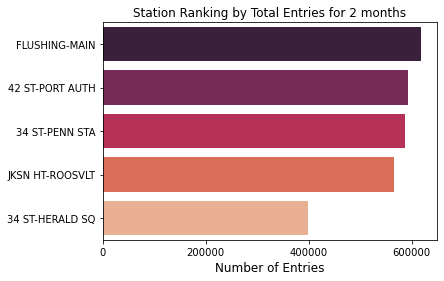

In [61]:
ax=sns.barplot(x=for_plot['H_ENTRIES'].head(5), y=for_plot['STATION'].head(5), palette="rocket")
##ax.set(xlabel='number of entries', ylabel='Station name')
plt.xlabel('Number of Entries',size=12)
plt.ylabel('')
plt.title('Station Ranking by Total Entries for 2 months')
plt.xticks(np.arange(0, 600001, 200000))

In [129]:
mask = (daily_ENTRIES.STATION == '42 ST-PORT AUTH')
study_case=daily_ENTRIES[(daily_ENTRIES.STATION == '42 ST-PORT AUTH')].reset_index()
study_case.head(42)

,index,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,H_ENTRIES,H
0,426367,N060,R010,01-00-00,42 ST-PORT AUTH,2021-07-31 02:00:00,10550596.0,0.0,02
1,426368,N060,R010,01-00-00,42 ST-PORT AUTH,2021-07-31 06:00:00,16.0,16.0,06
2,426369,N060,R010,01-00-00,42 ST-PORT AUTH,2021-07-31 10:00:00,31.0,31.0,10
3,426370,N060,R010,01-00-00,42 ST-PORT AUTH,2021-07-31 14:00:00,49.0,49.0,14
4,426371,N060,R010,01-00-00,42 ST-PORT AUTH,2021-07-31 18:00:00,101.0,101.0,18
5,426372,N060,R010,01-00-00,42 ST-PORT AUTH,2021-07-31 22:00:00,88.0,88.0,22
6,426373,N060,R010,01-00-00,42 ST-PORT AUTH,2021-08-01 02:00:00,74.0,74.0,02
7,426374,N060,R010,01-00-00,42 ST-PORT AUTH,2021-08-01 06:00:00,13.0,13.0,06
8,426375,N060,R010,01-00-00,42 ST-PORT AUTH,2021-08-01 10:00:00,23.0,23.0,10
9,426376,N060,R010,01-00-00,42 ST-PORT AUTH,2021-08-01 14:00:00,35.0,35.0,14


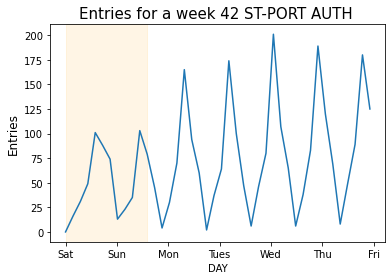

In [126]:
##mask1 = (study_case['DATE_TIME'] > '2021-07-31 01:59:00') & (study_case['DATE_TIME'] <= '2021-07-31 18:00:00'
plt.plot(np.arange(2,85,2),study_case.H_ENTRIES.head(42))
plt.xticks(np.linspace(2,85,7),['Sat','Sun','Mon','Tues','Wed','Thu','Fri'])
plt.title("Entries for a week 42 ST-PORT AUTH ",fontsize=15,c='black')
plt.axvspan(2, 24, color='orange', alpha=0.1)

plt.xlabel('DAY')
plt.ylabel('Entries',size=12)
plt.show()

## at weekday metro is used more 
##wdnestday has a peak

In [148]:
#x=np.arange(2,34357,2)
#x.shape
#study_case.loc[24:29,'H_ENTRIES']

24     47.0
25      6.0
26     46.0
27     80.0
28    201.0
29    107.0
Name: H_ENTRIES, dtype: float64

In [139]:
x=np.array([2,6,10,14,18,22,26])
y=study_case['H_ENTRIES'].head(7).to_numpy()
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

## making the line smooth

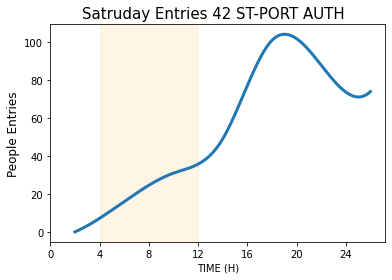

In [163]:
plt.plot(X_, Y_,linewidth=3)
plt.title("Satruday Entries 42 ST-PORT AUTH  ",fontsize=15,c='black')
plt.axvspan(4, 12, color='orange', alpha=0.1)
plt.xticks(np.arange(0, 25, 4))
plt.xlabel('TIME (H)')
plt.ylabel('People Entries',size=12)
plt.show()

##we should make offers at weekend assuming no ppl are coming to increase sales


In [144]:
#bb=study_case.groupby('DATE_TIME').H_ENTRIES.mean().reset_index()

,DATE_TIME,H_ENTRIES
0,2021-07-31 00:00:00,0.000000
1,2021-07-31 02:00:00,109.736842
2,2021-07-31 04:00:00,10.593750
3,2021-07-31 06:00:00,18.052632
4,2021-07-31 08:00:00,43.031250
...,...,...
673,2021-09-24 14:00:00,130.000000
674,2021-09-24 16:00:00,116.937500
675,2021-09-24 18:00:00,222.105263
676,2021-09-24 20:00:00,166.343750


In [150]:
x1=np.array([2,6,10,14,18,22,26])
y1=study_case.loc[24:30,'H_ENTRIES'].to_numpy()
X1_Y1_Spline = make_interp_spline(x1, y1)
X_1 = np.linspace(x1.min(), x1.max(), 500)
Y_1 = X1_Y1_Spline(X_1)

## making the line smooth

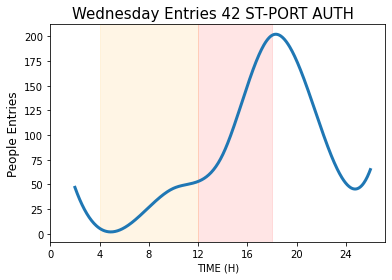

In [158]:
plt.plot(X_1, Y_1,linewidth=3)
plt.title("Wednesday Entries 42 ST-PORT AUTH  ",fontsize=15,c='black')
plt.axvspan(4, 12, color='orange', alpha=0.1)
plt.axvspan(12, 18, color='red', alpha=0.1)
plt.xticks(np.arange(0, 25, 4))
plt.xlabel('TIME (H)')
plt.ylabel('People Entries',size=12)
plt.show()

## we could extend the breakfast menu are weekdays to include the peak 